# Exploratory Data Analysis
[Medium Article](https://github.com/miykael/miykael.github.io/blob/master/assets/nb/03_advanced_eda/nb_advanced_eda.ipynb)  
[4 pandas functions](https://link.medium.com/8c94hIK89nb)  
[data engineering code snippets](https://link.medium.com/vF17WXqgbob)

In [2]:
from sklearn.datasets import fetch_openml
# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

# Extract feature matrix X and show 5 random samples
df_x = dataset['frame']
df_x.sample(5)

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
183900,201531B264315,2.0,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,3.0
292301,2015471503405,1.0,9.0,0.0,17.0,0.0,0.0,0.0,0.0,1.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,7.0
208785,2015360088149,3.0,20.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,7.0
331918,2015610010415,1.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,10.0,3.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,NaN
52002,201501YR90554,2.0,11.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,...,7.0,3.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,2.0


## Structure Investigation

In [5]:
# show size of the dataset
df_x.shape

(363243, 67)

In [6]:
import pandas as pd
# Count how many times each data type is present
pd.value_counts(df_x.dtypes)

float64    61
object      6
dtype: int64

In [7]:
# Display non-numeric types
df_x.select_dtypes(exclude='number').head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [8]:
df_x.Sex_of_Driver = df_x.Sex_of_Driver.astype('float')

In [10]:
df_x.describe(exclude='number')

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


<AxesSubplot:title={'center':'Unique values per feature'}>

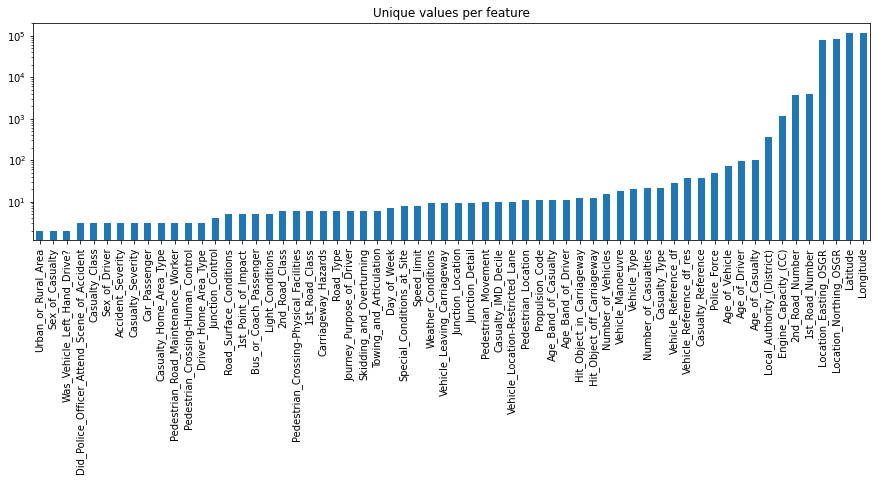

In [14]:
# For each numerical feature compute number of unique entries
unique_values = df_x.select_dtypes(include="number").nunique().sort_values()
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

In [17]:
df_x.info()
df_x.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  float64
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriageway                  363084 non-nul

,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,363243.000000,363181.000000,362864.000000,363059.000000,363067.000000,363159.000000,363067.000000,363080.000000,363084.000000,363242.000000,...,357674.000000,363243.000000,363241.000000,363241.000000,362481.000000,363197.000000,363077.000000,363243.000000,323448.000000,293666.000000
mean,1.696203,9.756953,0.029766,12.607326,0.109233,2.609361,0.188139,0.307480,0.366689,0.546699,...,6.431284,2.875725,0.380731,0.276467,0.281027,0.066127,0.032833,7.840080,1.308186,5.107323
std,1.487094,8.315189,0.294127,6.218689,0.903131,3.249245,0.714243,1.595551,1.374107,2.094845,...,2.157860,0.355195,1.522220,1.294574,0.591239,0.493174,0.253780,7.366436,0.657776,2.829458
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,3.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


## Quality Investigation

In [23]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_x.drop(labels=["Accident_Index"], axis=1).duplicated().sum() # drop the first column
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


In [26]:
columns_to_consider = df_x.drop(labels=['Accident_Index'], axis=1).columns

In [28]:
# Drop duplicates based on 'columns_to_consider'
df_X = df_x.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 67)

Text(0, 0.5, 'Sample Number')

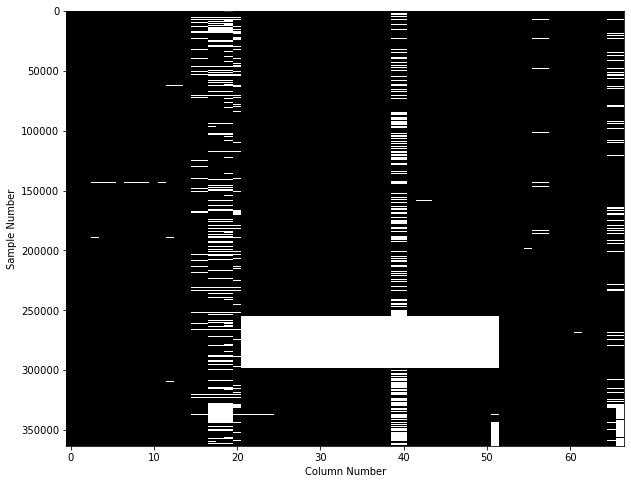

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

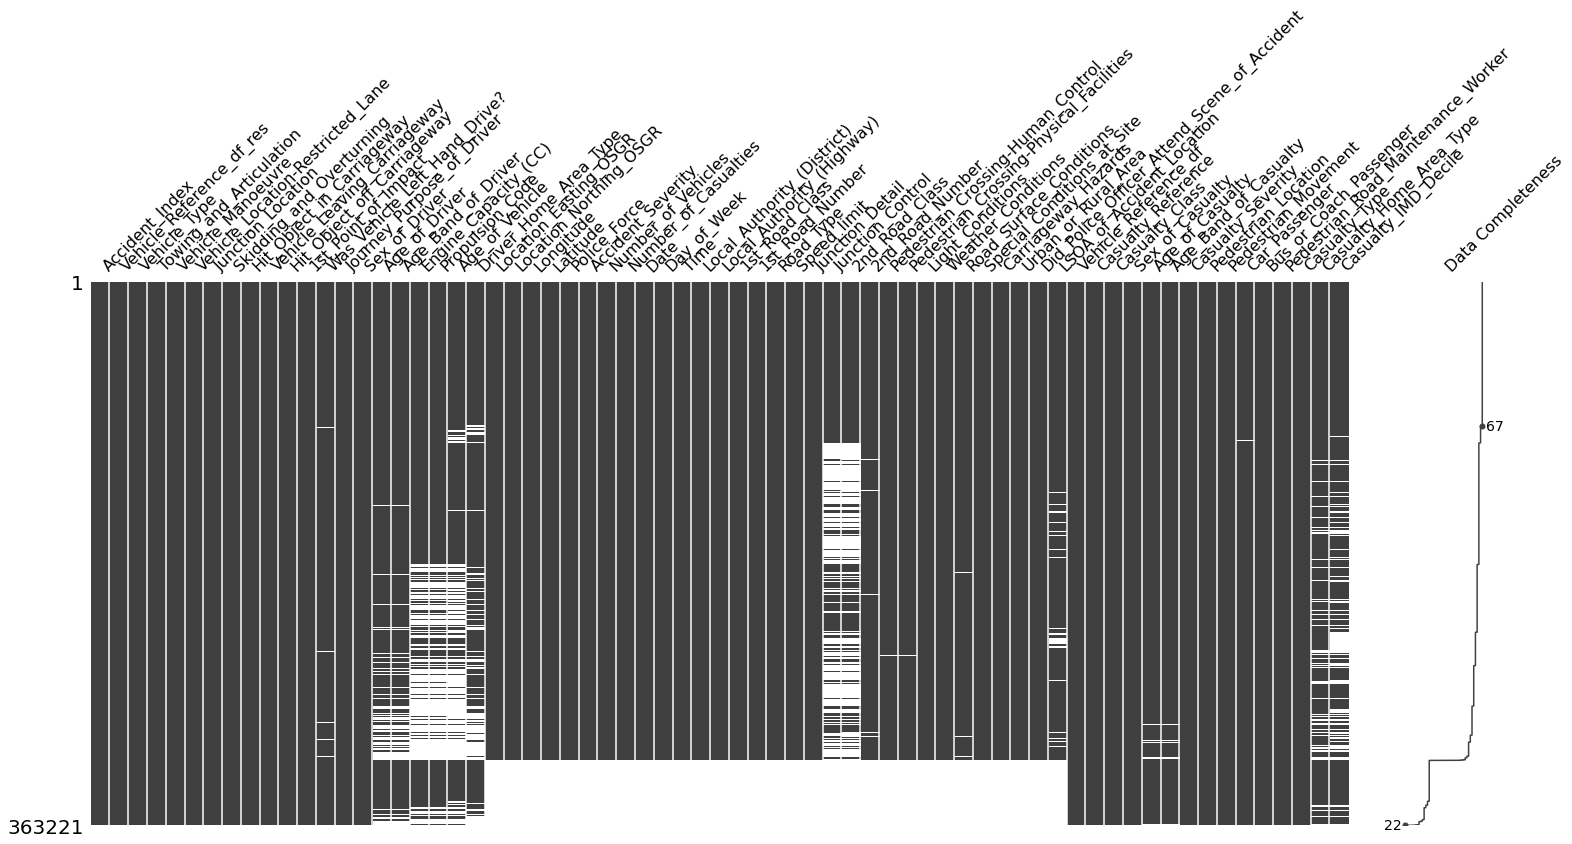

In [31]:
import missingno as msno

msno.matrix(df_X, labels=True, sort="descending");

In [32]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)